In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
X, y = make_regression(n_samples=500, n_features=3, n_informative=2, noise=10, random_state=42)

In [8]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2', 'Feature_3'])
df['Target'] = y
X_train, X_test, y_train, y_test = train_test_split(df[['Feature_1', 'Feature_2', 'Feature_3']], df['Target'], test_size=0.2, random_state=42)

In [9]:
knn = KNeighborsRegressor(n_neighbors=10, weights='distance')
knn.fit(X_train, y_train)

,n_neighbors,10
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
score = knn.score(X_test, y_test)
score

0.9495423436029319

In [11]:
x1_range = np.linspace(df['Feature_1'].min(), df['Feature_1'].max(), 50)
x2_range = np.linspace(df['Feature_2'].min(), df['Feature_2'].max(), 50)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Create the constant value for Feature 3 (using mean)
x3_const = np.full(x1_mesh.shape, df['Feature_3'].mean())

# Flatten grids to predict
input_grid = np.c_[x1_mesh.ravel(), x2_mesh.ravel(), x3_const.ravel()]

# Predict Z values (Target)
z_pred = knn.predict(input_grid)
z_mesh = z_pred.reshape(x1_mesh.shape)

C:\Users\DELL\miniconda3\envs\campusx\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


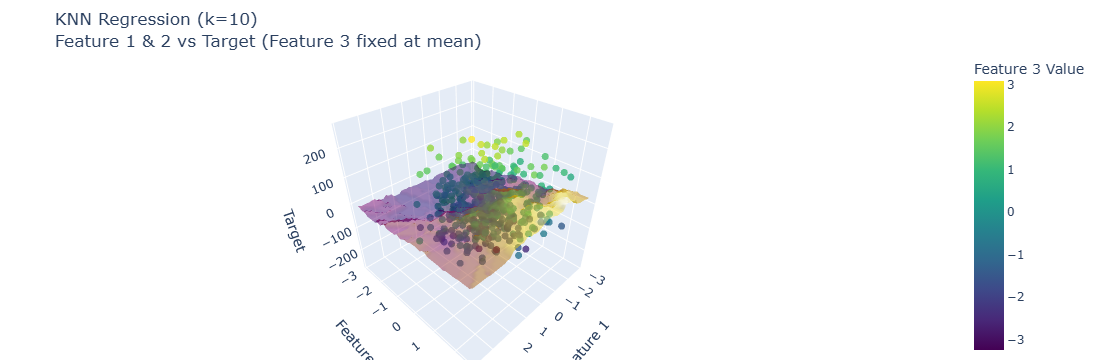

In [12]:
scatter = go.Scatter3d(
        x=df['Feature_1'],
        y=df['Feature_2'],
        z=df['Target'],
        mode='markers',
        marker=dict(
            size=4,
            color=df['Feature_3'], # Color represents the 3rd feature
            colorscale='Viridis',
            opacity=0.8,
            colorbar=dict(title='Feature 3 Value')
        ),
        name='Actual Data'
    )

# Surface plot of the KNN predictions
surface = go.Surface(
    z=z_mesh,
    x=x1_mesh,
    y=x2_mesh,
    colorscale='Electric',
    opacity=0.5,
    name='KNN Prediction Surface',
    showscale=False
)

# Layout configuration
layout = go.Layout(
    title=f'KNN Regression (k=10)<br>Feature 1 & 2 vs Target (Feature 3 fixed at mean)',
    scene=dict(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        zaxis_title='Target'
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

fig = go.Figure(data=[scatter, surface], layout=layout)

# This will open the plot in your default browser
fig.show()